![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/05_Cluster%20Analysis%20con%20k-Means/05_clustering-kmeans_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 05 | Cluster Analysis with k-Means

## Load the Data

- Simply execute the following lines of code to load the data
- This dataset contains **statistics** (columns)
- About **Car Models** (rows)

In [1]:
import seaborn as sns #!

df_mpg = sns.load_dataset(name='mpg', index_col='name')
df_mpg.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
audi 4000,34.3,4,97.0,78.0,2188,15.8,80,europe
plymouth horizon tc3,34.5,4,105.0,70.0,2150,14.9,79,usa
buick skylark limited,28.4,4,151.0,90.0,2670,16.0,79,usa
oldsmobile cutlass supreme,17.0,8,260.0,110.0,4060,19.0,77,usa
amc matador,18.0,6,232.0,100.0,3288,15.5,71,usa


## Feature Selection

- Select 2 columns for the modelling

In [2]:
features = df_mpg[['mpg', 'displacement']]

In [3]:
features.head()

,mpg,displacement
name,,
chevrolet chevelle malibu,18.0,307.0
buick skylark 320,15.0,350.0
plymouth satellite,18.0,318.0
amc rebel sst,16.0,304.0
ford torino,17.0,302.0


## Data `preprocessing`

- Do you need to *transform* the data
- To get a **truthful insight** of the model?

*Dropping NaN values*

In [4]:
features.isnull().sum()

mpg             0
displacement    0
dtype: int64

In [5]:
features = features.dropna()

*Scaling the data*

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()

In [8]:
df_scaled = scaler.fit_transform(features)

## `KMeans()` Model in Python

### Fit the Model

- To cluster 3 groups

In [9]:
from sklearn.cluster import KMeans

In [10]:
model_km = KMeans(n_clusters=3)

In [11]:
model_km.fit(df_scaled)

KMeans(n_clusters=3)

### Calculate Predictions

In [12]:
model_km.predict(X=df_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2,
       1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 2,

### Create a New DataFrame for the Predictions

In [13]:
df_pred = features.copy()

In [14]:
df_pred["pred_KMeans"] = model_km.predict(df_scaled)

In [15]:
df_pred.head()

,mpg,displacement,pred_KMeans
name,,,
chevrolet chevelle malibu,18.0,307.0,0
buick skylark 320,15.0,350.0,0
plymouth satellite,18.0,318.0,0
amc rebel sst,16.0,304.0,0
ford torino,17.0,302.0,0


### Visualize the Model

- You colour the points with the the value of the predictions

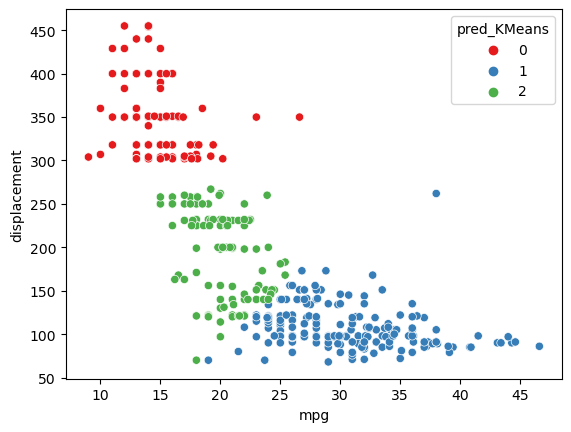

In [16]:
sns.scatterplot(x='mpg', y='displacement', hue='pred_KMeans',
                palette='Set1', data=df_pred);

## Other `Clustering` Models in Python

- Visit the `sklearn` website [here ↗](https://scikit-learn.org/stable/)
- **Pick 2 new models** and compute the *Clustering*

### Other Model 1

#### Fit the Model

- To cluster 3 groups

In [25]:
from sklearn.cluster import SpectralClustering

In [26]:
model_sc = SpectralClustering(n_clusters=3)

#### Calculate Predictions

In [27]:
model_sc.fit_predict(X=df_scaled)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1,
       0, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1,

#### Create a New Column for the Predictions

In [28]:
df_pred["pred_SpectralC"] = model_sc.fit_predict(X=df_scaled)

#### Visualize the Model

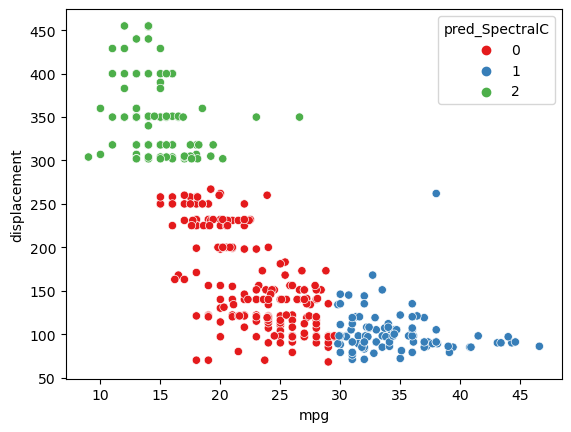

In [30]:
sns.scatterplot(x='mpg', y='displacement', hue='pred_SpectralC',
                palette='Set1', data=df_pred);

### Other Model 2

#### Fit the Model

- To cluster 3 groups

In [51]:
from sklearn.cluster import BisectingKMeans

In [52]:
model_bk = BisectingKMeans(n_clusters=3)

In [53]:
model_bk.fit(X=df_scaled)

BisectingKMeans(n_clusters=3)

#### Calculate Predictions

In [54]:
model_bk.predict(X=df_scaled)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0,
       0, 2, 2, 2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 1,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 1, 2,

#### Create a New Column for the Predictions

In [55]:
df_pred["pred_BisectingKM"] = model_bk.predict(X=df_scaled)

#### Visualize the Model

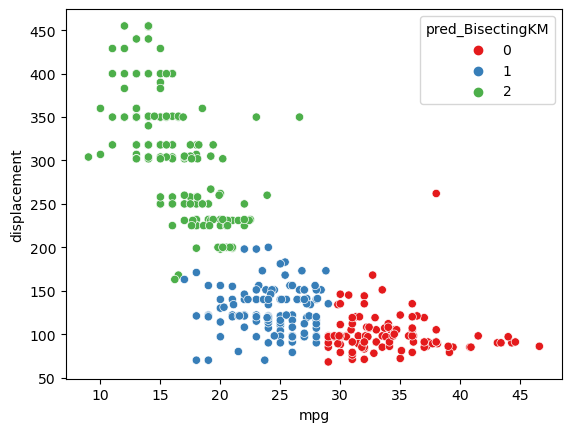

In [56]:
sns.scatterplot(x='mpg', y='displacement', hue='pred_BisectingKM',
                palette='Set1', data=df_pred);

#### **Visualizing the three models**

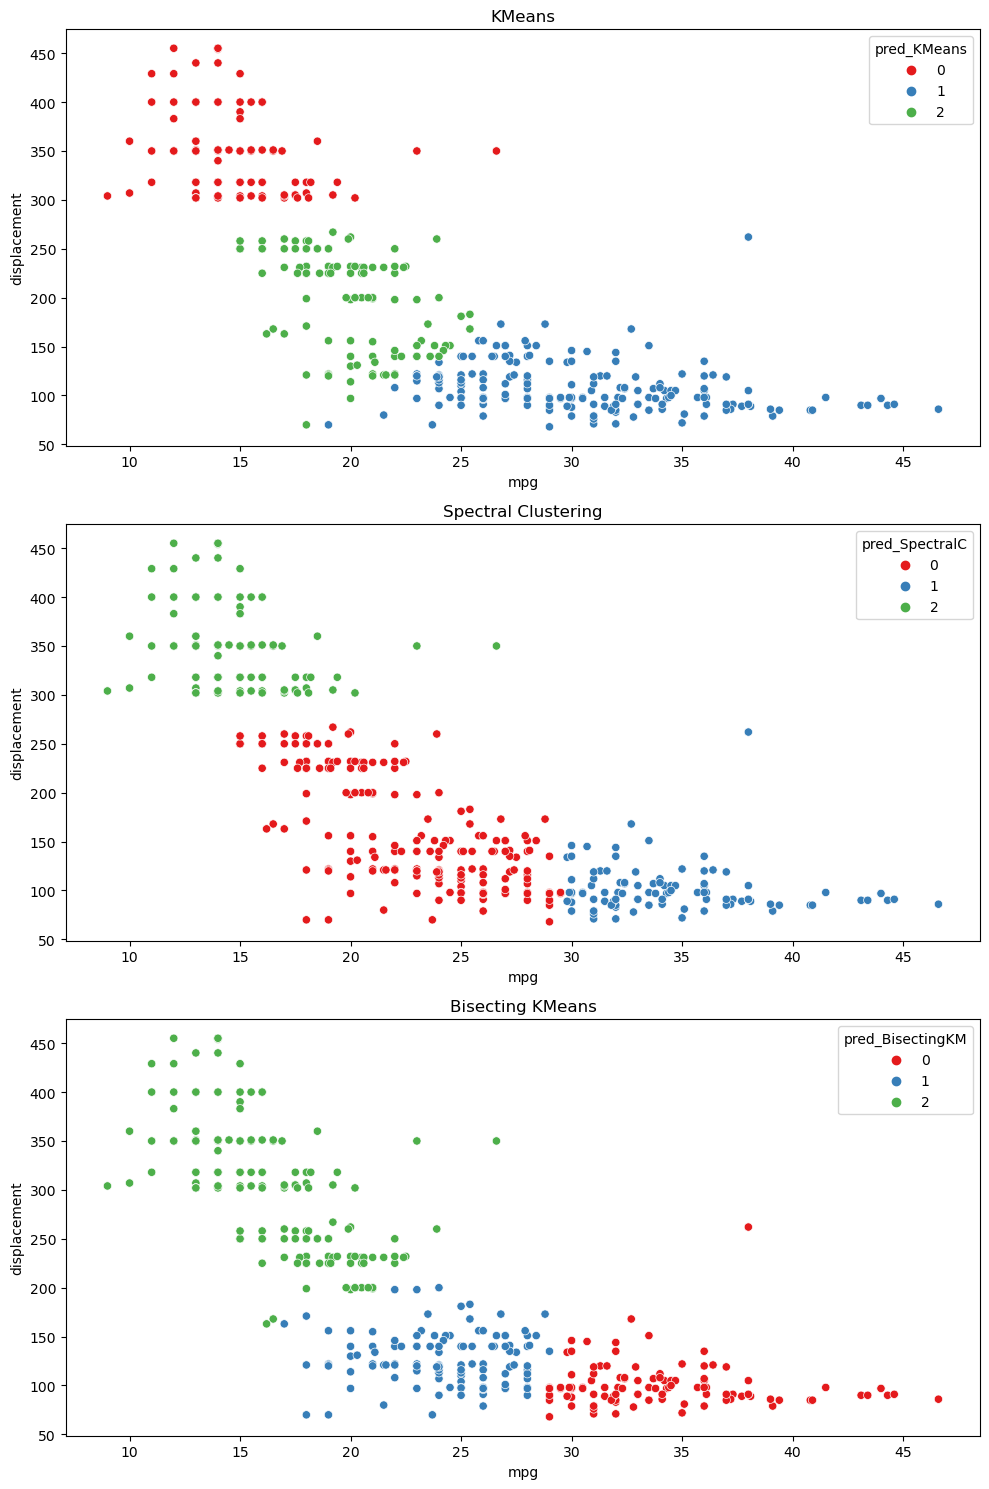

In [82]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 15))

sns.scatterplot(x='mpg', y='displacement', hue='pred_KMeans',
                data=df_pred, palette='Set1', ax=ax1);

sns.scatterplot(x='mpg', y='displacement', hue='pred_SpectralC',
                data=df_pred, palette='Set1', ax=ax2);

sns.scatterplot(x='mpg', y='displacement', hue='pred_BisectingKM',
                data=df_pred, palette='Set1', ax=ax3);



ax1.set_title('KMeans')
ax2.set_title('Spectral Clustering')
ax3.set_title('Bisecting KMeans')


plt.tight_layout()


## Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [X] Understand how the **machine optimizes a model**
    - No more than to find the best numbers for a mathematical equation
- [X] **Residual Sum of Squares (RSS)** as a fundamental measure for the **error**. We see it on ↓
    - [Neural Networks](https://youtu.be/IHZwWFHWa-w?t=211) 
    - Linear Regression
    - Variance
- [X] Understand the necessity to **Scale** the Data
    - For all algorithms that involves **distance calculation**.
- [X] Understand that programming is not an end itself, but a tool to achieve the end
    - We need to understand the problem and design the solution before coding
    - But we won't need how to design the solution if we don't know how to code first
    - Solution? Apply the discipline
- [X] There is **not a unique way to group data**. The same way it is not a unique way ↓
    - To predict a number **Regression Mathematical Equations**
    - To predict a category **Classification Mathematical Equations**

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.